In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------
# Questão 0: Utilize o algoritmo do método da Bissecção, com tolerância 0.000001, para resolver os seguintes casos:

In [2]:
def bissec(f, a, b, tol = 1e-6, maxIt = 50):
    fa = f(a)
    fb = f(b)
    
    if(np.abs(fa) <= tol):
        return a, 0
    if(np.abs(fb) <= tol):
        return b, 0
    if(fa*fb > 0):
        print("Intervalo é inválido")
        return 0, -1
    
    for it in range(maxIt):
        x = (a + b)/2
        fx = f(x)
        
        if(np.abs(fx) <= tol):
            return x, it+1
        
        if(fa*fx < 0):
            b = x
            fb = fx
        else: #fb*fx < 0
            a = x
            fa = fx
    
    print("O método não convergiu nas iterações, ou seja, não atingiu a tolerância")
    return x, maxIt

## x - 2^(-x) = 0, considerando o intervalo 0<=x<=1 

In [3]:
f = lambda x: x - 2**(-x)
x, it = bissec(f, 0, 1)
print('> ', x, f(x), it)

>  0.6411857604980469 2.3100954371635396e-08 18


## exp(x) - x² + 3x - 2 = 0, considerando o intervalo 0<=x<=1 

In [4]:
f = lambda x: np.exp(x) - x**2 + 3*x - 2
x, it = bissec(f, 0, 1)
print('> ', x, f(x), it)

>  0.25753021240234375 -2.759847070876731e-07 17


## 2xcos(2x) - (x+1)² = 0, considerando os intervalos -3<=x<=-2, -1<=x<=0 

In [5]:
f = lambda x: 2*x*np.cos(2*x) - (x + 1)**2
x, it = bissec(f, -3, -2)
print('> ', x, f(x), it)
x, it = bissec(f, -1, 0)
print('> ', x, f(x), it)

>  -2.19130802154541 -9.775346199170087e-08 20
>  -0.7981600761413574 4.1836280610663135e-07 21


## xcos(x) - 2x² + 3x - 1 = 0, considerando os intervalos 0.2<=x<=0.3, 1.2<=x<=1.3 

In [6]:
f = lambda x: x*np.cos(x) - 2*x**2 + 3*x - 1
x, it = bissec(f, 0.2, 0.3)
print('> ', x, f(x), it)
x, it = bissec(f, 1.2, 1.3)
print('> ', x, f(x), it)

>  0.29753036499023444 3.517655073892456e-07 17
>  1.2566230773925782 7.139104405418095e-07 17


# ------
# Questão 1: Utilize o algoritmo do método de Newton, com tolerância 0.000001, para resolver os seguintes casos:

In [7]:
def metNewt(f, df, x0, tol = 1e-6, maxIt = 50):
    for it in range(maxIt):
        fx = f(x0)
        if(np.abs(fx) <= tol):
            return x0, it
        
        if(df(x0) == 0):
            print("A derivada zerou")
            return x, it
        
        x0 = x0 - f(x0)/df(x0)
    
    print("O método não atingiu a tolerância!")
    return x0, maxIt

In [8]:
result = [] #Vetor para armazenar os resultados e plotar na Questão 3

## exp(x) + 2^(-x) + 2cos(x) - 6 = 0, considerando o intervalo 1<=x<=2

In [9]:
f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
df = lambda x: np.exp(x) - 2**(-x)*np.log(2) - 2*np.sin(x)

x, it = metNewt(f, df, 1)
print('> ', x, f(x), it)
result.append(x)

>  1.829383602512459 2.3731692166961693e-09 7


## ln(x-1) + cos(x-1) = 0, considerando o intervalo 1.3<=x<=2

In [10]:
f = lambda x: np.log(x - 1) + np.cos(x - 1)
df = lambda x: 1/(x - 1) - np.sin(x - 1)

x, it = metNewt(f, df, 1.3)
print('> ', x, f(x), it)
result.append(x)

>  1.3977481644736214 -6.624694446344392e-07 3


## 2xcos(2x) - (x-2)² = 0, considerando os intervalos 2<=x<=3, 3<=x<=4

In [11]:
f = lambda x: 2*x*np.cos(2*x) - (x - 2)**2
df = lambda x: 2*np.cos(2*x) - 4*x*np.sin(2*x) - 2*(x - 2)

x, it = metNewt(f, df, 2)
print('> ', x, f(x), it)
result.append(x)
x, it = metNewt(f, df, 3)
print('> ', x, f(x), it)

x, it = metNewt(f, df, 3.001)
print('> ', x, f(x), it)
result.append(x)

>  2.3706869176622676 5.2513549064769904e-14 4
>  2.3706870165845224 8.70056168222888e-07 5
>  3.7221127731388566 -6.043472389194449e-10 10


## sin(x) - exp(-x) = 0, considerando os intervalos 0<=x<=1, 3<=x<=4, 6<=x<=7

In [12]:
f = lambda x: np.sin(x) - np.exp(-x)
df = lambda x: np.cos(x) + np.exp(-x)

x, it = metNewt(f, df, 0)
print('> ', x, f(x), it)
result.append(x)
x, it = metNewt(f, df, 3)
print('> ', x, f(x), it)
result.append(x)
x, it = metNewt(f, df, 6)
print('> ', x, f(x), it)
result.append(x)

>  0.5885327439774188 -6.160960630552381e-12 4
>  3.0963639608966513 -2.7168927836662693e-08 2
>  6.285049004142744 -2.6974122881509577e-07 2


# ------
# Questão 2: Uma forma de evitar o uso do cálculo da derivada da função f(x) no algoritmo do método de Newton é substituir o valor da derivada por uma aproximação. Ou seja, no lugar de calcular a cada passo o termo f'(x^(k)) podemos usar:
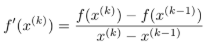
# Esse método é conhecido como método da secante.
# • Utilize o método da secante para resolver os mesmos exercícios do item anterior, com a mesma tolerância. Observe que você deve escolher dois chutes iniciais! Para cada caso, compare o número de iterações do método de Newton e o da secante.

In [13]:
def metSec(f, xAnt, x0, tol = 1e-6, maxIt = 50):
    for it in range(maxIt):
        fx = f(x0)
        if(np.abs(fx) <= tol):
            return x0, it
        
        #Aproximando o valor da derivada
        dfx0 = (f(x0) - f(xAnt))/(x0 - xAnt)
        if(dfx0 == 0):
            print("A derivada zerou")
            return x, it
        
        x = x0
        x0 = x0 - f(x0)/dfx0
    
    print("O método não atingiu a tolerância!")
    return x0, maxIt

## exp(x) + 2^(-x) + 2cos(x) - 6 = 0, considerando o intervalo 1<=x<=2

In [28]:
f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
df = lambda x: np.exp(x) - 2**(-x)*np.log(2) - 2*np.sin(x)

x, it = metSec(f, 1.2, 1.3)
print('> ', x, f(x), it)

>  1.8293834294825584 -7.073088301723374e-07 42


In [15]:
# O método de Newton utilizou 7 iterações para obter o resultado da equação

## ln(x-1) + cos(x-1) = 0, considerando o intervalo 1.3<=x<=2

In [16]:
f = lambda x: np.log(x - 1) + np.cos(x - 1)
df = lambda x: 1/(x - 1) - np.sin(x - 1)

x, it = metSec(f, 1.3, 1.31)
print('> ', x, f(x), it)

>  1.3977482001017572 -5.866951604538428e-07 7


In [17]:
# O método de Newton utilizou 3 iterações para obter o resultado da equação

## 2xcos(2x) - (x-2)² = 0, considerando os intervalos 2<=x<=3, 3<=x<=4

In [18]:
f = lambda x: 2*x*np.cos(2*x) - (x - 2)**2
df = lambda x: 2*np.cos(2*x) - 4*x*np.sin(2*x) - 2*(x - 2)

x, it = metSec(f, 2, 2.1)
print('> ', x, f(x), it)
x, it = metSec(f, 3, 3.1)
print('> ', x, f(x), it)

x, it = metSec(f, 3.3, 3.4)
print('> ', x, f(x), it)

>  2.370686995098252 6.810768372333964e-07 11
>  2.370686894515888 -2.0358050981106324e-07 12
>  3.7221128300150053 -9.27879550971511e-07 23


In [19]:
# O método de Newton utilizou respectivamente 4, 5 e 10 iterações para obter o resultado da equação

## sin(x) - exp(-x) = 0, considerando os intervalos 0<=x<=1, 3<=x<=4, 6<=x<=7

In [20]:
f = lambda x: np.sin(x) - np.exp(-x)
df = lambda x: np.cos(x) + np.exp(-x)

x, it = metSec(f, 0, 0.1)
print('> ', x, f(x), it)
x, it = metSec(f, 3, 3.1)
print('> ', x, f(x), it)
x, it = metSec(f, 6, 6.1)
print('> ', x, f(x), it)

>  0.5885322269626375 -7.170527293043349e-07 8
>  3.096364075287336 -1.362706516030987e-07 2
>  6.28504996483996 6.927450236272632e-07 3


In [21]:
# O método de Newton utilizou respectivamente 4, 2 e 2 iterações para obter o resultado da equação

In [22]:
# Dessa forma, observa-se que o método de Newton utiliza menos iterações que o método da secante. Isso se deve ao fato de que, para o método de Newton, é necessário saber a derivada exata. Já no método da secante, esse valor é calculado via aproximação.

# Questão 3: Esse exercício deve ser feito apenas após o termino dos anteriores. Utilize os comandos do Octave de construir gráficos, e faça os plots das funções do exercício 1, de acordo com intervalo dado.

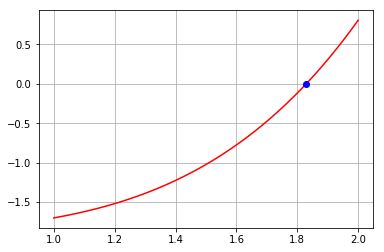

In [23]:
f = lambda x: np.exp(x) + 2**(-x) + 2*np.cos(x) - 6
x = np.linspace(1, 2, 1000)
plt.plot(x, f(x), 'r-')
plt.plot(result[0], f(result[0]), 'bo')
plt.grid()

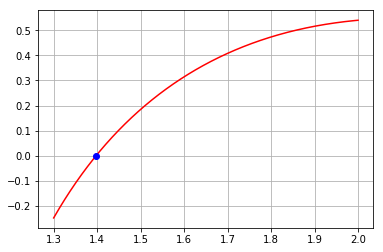

In [24]:
f = lambda x: np.log(x - 1) + np.cos(x - 1)
x = np.linspace(1.3, 2, 1000)
plt.plot(x, f(x), 'r-')
plt.plot(result[1], f(result[1]), 'bo')
plt.grid()

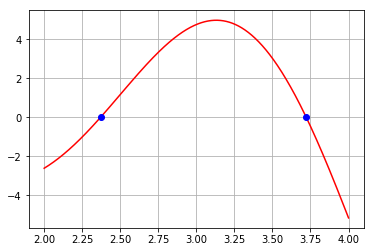

In [25]:
f = lambda x: 2*x*np.cos(2*x) - (x - 2)**2
x = np.linspace(2, 4, 1000)
plt.plot(x, f(x), 'r-')
plt.plot(result[2], f(result[2]), 'bo')
plt.plot(result[3], f(result[3]), 'bo')
plt.grid()

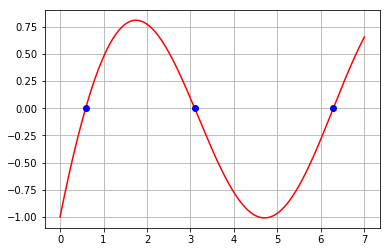

In [26]:
f = lambda x: np.sin(x) - np.exp(-x)
x = np.linspace(0, 7, 1000)
plt.plot(x, f(x), 'r-')
plt.plot(result[4], f(result[4]), 'bo')
plt.plot(result[5], f(result[5]), 'bo')
plt.plot(result[6], f(result[6]), 'bo')
plt.grid()